# Why need to study that topic
Maternal mortality is considered a key health indicator and the direct causes of maternal deaths are well known and largely preventable and treatable. Reduction of child mortality is reflected in several of the countries Sustainable Development Goals but it is not 100%. There is some data which i get from google which shows ruduction of child mortality but we observe that that is really small decline.   
The current infant mortality rate for India in 2023 is 26.619 deaths per 1000 live births, a 3.89% decline from 2022. The infant mortality rate for India in 2022 was 27.695 deaths per 1000 live births, a 3.74% decline from 2021. The infant mortality rate for India in 2021 was 28.771 deaths per 1000 live births, a 3.61% decline from 2020. The infant mortality rate for India in 2020 was 29.848 deaths per 1000 live births, a 3.48% decline from 2019.
However, traditional fetal health assessment methods such as fetal heart rate monitoring and ultrasound imaging are subjective and may not provide accurate predictions. Therefore, there is a need to develop a machine-learning model that can accurately classify fetal health based on various fetal health indicators.


In [4]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import VarianceThreshold

from scipy.stats import zscore

from scipy import stats

from sklearn.impute import KNNImputer

from sklearn.model_selection import train_test_split , GridSearchCV , RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

import warnings
warnings.filterwarnings('ignore')

# 1.Problem Statment
To preadict the health of a fetus is Normal, Suspect or Pathological using cardiotocography (CTG) data.

##### It contain following features,
        baseline value - Baseline Fetal Heart Rate (FHR) (beats per minute)
        accelerations - Number of accelerations per second
        fetal_movement - Number of fetal movements per second
        uterine_contractions - Number of uterine contractions per second
        light_decelerations - Number of light decelerations per second
        severe_decelerations - Number of severe decelerations per second
        prolongued_decelerations - Number of prolonged decelerations per second
        abnormal_short_term_variability - Percentage of time with abnormal short-term variability
        mean_value_of_short_term_variability - Mean value of short-term variability
        percentage_of_time_with_abnormal_long_term_variability - Percentage of time with abnormal long-term variability
        mean_value_of_long_term_variability - Mean value of long-term variability
        histogram_width - Width of FHR histogram (generated from exam)
        histogram_min - Minimum of FHR histogram (generated from exam)
        histogram_max - Maximum of FHR histogram (generated from exam)
        histogram_number_of_peaks - Number of FHR histogram peaks (generated from exam)
        histogram_number_of_zeroes - Number of FHR histogram zeroes (generated from exam)
        histogram_mode - Mode of FHR histogram (generated from exam)
        histogram_mean - Mean of FHR histogram (generated from exam)
        histogram_median - Median of FHR histogram (generated from exam)
        histogram_variance - Variance of FHR histogram (generated from exam)
        histogram_tendency - Tendency of FHR histogram (generated from exam)
        fetal_health - Fetal health as assessed by expert obstetrician. 1 - Normal, 2 - Suspect, 3 - Pathological. 

# 2. Data Gathering

In [5]:
df = pd.read_csv('fetal_health.csv')
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120,0.000,0.000,0.000,0.000,0.0,0.0,73,0.5,43.0,...,62,126,2,0.0,120,137,121,73.0,1.0,2
1,132,0.006,0.000,0.006,0.003,0.0,0.0,17,2.1,0.0,...,68,198,6,1.0,141,136,140,12.0,0.0,1
2,133,0.003,0.000,0.008,0.003,0.0,0.0,16,2.1,0.0,...,68,198,5,1.0,141,135,138,13.0,0.0,1
3,134,0.003,0.000,0.008,0.003,0.0,0.0,16,2.4,0.0,...,53,170,11,0.0,137,134,137,13.0,1.0,1
4,132,0.007,0.000,0.008,0.000,0.0,0.0,16,2.4,0.0,...,53,170,9,0.0,137,136,138,11.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140,0.000,0.000,0.007,0.000,0.0,0.0,79,0.2,25.0,...,137,177,4,0.0,153,150,152,2.0,0.0,2
2122,140,0.001,0.000,0.007,0.000,0.0,0.0,78,0.4,22.0,...,103,169,6,0.0,152,148,151,3.0,1.0,2
2123,140,0.001,0.000,0.007,0.000,0.0,0.0,79,0.4,20.0,...,103,170,5,0.0,153,148,152,4.0,1.0,2
2124,140,0.001,0.000,0.006,0.000,0.0,0.0,78,0.4,27.0,...,103,169,6,0.0,152,147,151,4.0,1.0,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   int64  
 1   accelerations                                           2124 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2125 non-null   float64
 5   severe_decelerations                                    2124 non-null   float64
 6   prolongued_decelerations                                2121 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   int64  
 8   mean_value_of_short_term_variability  

So here we seen that all data is in contineous form so we did not need to count the values. So here i will explain all features shorly and then find the statistics for all featurs.

# Feature Explination

### 1.baseline value -
Baseline Fetal Heart Rate (FHR) (beats per minute)

Baseline fetal heart rate (FHR) is the mean level of the FHR when this is stable, excluding accelerations and decelerations. It is determined over a time period of 5-10 minutes, expressed as beats per minute (bpm).
Preterm fetuses tend to have values towards the upper end of the normal range.
Baseline variability is the minor fluctuation in baseline FHR. 
It is assessed by estimating the difference in bpm between the highest peak and lowest trough of fluctuation in one minute segments of the trace1.
1. Normal variability 6-25 beats per minute
2. Reduced variability 3-5 beats per minute
3.  Absent variability <3 beats per minute
4. Increased (salutatory) variability > 25 beats per minute.
Current international guidelines recommend for the normal fetal heart rate (FHR) baseline different ranges of 
110 to 150 beats per minute (bpm) or 110 to 160 bpm

### 2. Accelerations
Number of accelerations per second

It is a visually apparent abrupt increase (onset to peak < 30 seconds) in the FHR from the baseline.

At 32 weeks of gestation and beyond,an acceleration has a peak at least 15 bpm above baseline and a duration of at least 15 seconds but < 2 minutes.

Before 32 weeks of gestation, an acceleration has peak at least 10 bpm above baseline and a duration of at least 10 seconds but < 2 minutes

Prolonged acceleration lasts ≥ 2 minutes but < 10 minutes

If an acceleration lasts ≥ 10 minutes, it is a baseline change

### 3.fetal_movement -
Number of fetal movements per second

Fetal movements felt by pregnant women are a sign that the fetus is growing in size and strength. The mother is usually the first to feel these movements,which can later be perceived by others.

Baby was start moving from 16 to 24 weeks. move more and more up until 32 weeks. continue to move roughly the same until you go into labour.

Ideally, mother want to feel 10 movements within two hours.

### 4. uterine_contractions -
Number of uterine contractions per second.

The uterine contraction. a rhythmic tightening in labor of the upper uterine musculature that contracts the sizeof the uterus and pushes the fetus toward the birth canal. type of: contraction, muscle contraction, muscular contraction.

There should be 3 to 5 contractions in the 10-minute window, each lasting 30 to 40 seconds. The monitoring of uterine contractions should be continuous during labor.

### 5. light_decelerations - 
 
Number of light decelerations per second

Fetal decelerations refer to temporary but distinct decreases of the fetal heart rate (FHR) identified during electronic fetal heart monitoring.

### 6.severe_decelerations -
Number of severe decelerations per second

It is a variable declaration and Variable decelerations reaching a nadir more than 60 beats per minute below the baseline and lasting longer than 60 seconds.

Variable decelerations reaching a nadir of fewer than 60 beats per minute regardless of baseline and lasting longer than 60 seconds.

### 7.prolongued_decelerations -
Number of prolonged decelerations per second

Prolonged deceleration when decrease in FHR below the baseline of 15 bpm or more, lasting at least 2 minutes but <10 minutes from onset to return to baseline.

### 8. abnormal_short_term_variability -
Percentage of time with abnormal short-term variability.

Short term variability (STV) is used to measure the cardiac autonomic control

Beat-to-beat or short-term variability is the oscillation of the FHR around the baseline

### 9.mean_value_of_short_term_variability -
Mean value of short-term variability

Short term variability (STV) is used to measure the cardiac autonomic control. This is an average of the absolute values of the differences between adjacent RR intervals in the electrocardiogram

### 10.mean_value_of_long_term_variability -¶
Mean value of long-term variability

The long-term variability for that child is defined to be the mean square of the departures of this smooth function from its mean level while the short-term variability is defined to be the variance of the error term. It is the fluctuation range of the heart beat interval period in analyzable one minute sections. The fluctuation range is calculated as a sum between maximal deviation above and below the baseline.

### 11.percentage_of_time_with_abnormal_long_term_variability -
Percentage of time with abnormal long-term variability

### 12. histogram_width -
Width of FHR histogram (generated from exam)

### 13. histogram_min -
Minimum of FHR histogram (generated from exam)

### 14. histogram_max -
Maximum of FHR histogram (generated from exam)

### 15. histogram_number_of_peaks -
Number of FHR histogram peaks (generated from exam)

### 16. histogram_number_of_zeroes -
Number of FHR histogram zeroes (generated from exam)

### 17. histogram_mode -
Mode of FHR histogram (generated from exam)

### 18. histogram_mean -
Mean of FHR histogram (generated from exam)

### 19. histogram_median -
Median of FHR histogram (generated from exam)

### 20. histogram_variance -
Variance of FHR histogram (generated from exam)

### 21. histogram_tendency -
Tendency of FHR histogram (generated from exam)

### 22.fetal_health(Target Variable) -
Predicting or identifying the fetus's health is extremely crucial, which can prevent and reduce the risk of perinatal mortality. There are three classes for classifying the CTG test reports: suspect, normal, or pathological.

# Data processing

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2124.0,0.003181,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2125.0,0.001890,0.002961,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2124.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2121.0,0.000159,0.000591,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2122.0,9.865221,18.409244,0.0,0.000,0.000,11.000,91.000


##### DataFrame.describe() method generates descriptive statistics for only numeric values not for categorical values.
This method summarizes the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.

#Now, let's understand the statistics that are generated by the describe() method:

Count tells us the number ofempty and NoN-empty rows in a feature. As we can see there are some of NoN-empty and empty rows.
Mean tells us the mean value of that feature.
Std tells us the Standard Deviation Value of that feature.
Min tells us the minimum value of that feature.
25%, 50%, and 75% are the percentile/quartile of each features. This quartile information helps us to detect Outliers.
Max tells us the maximum value of that feature.

### Handaling missing values
df.isnull().sum()


In [7]:
imputer = KNNImputer()
array = imputer.fit_transform(df)
df = pd.DataFrame(array, columns= df.columns)

In [8]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [13]:
histogram_columns = ['histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']

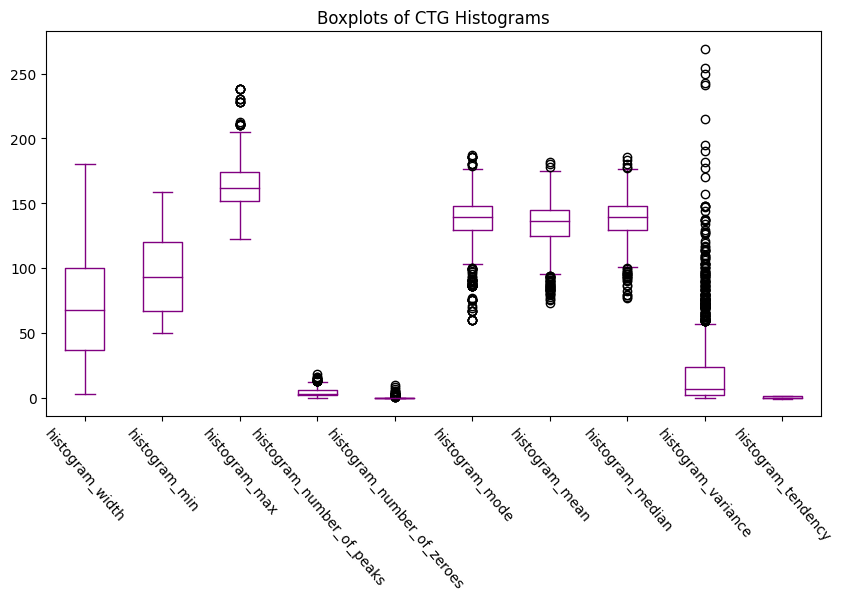

In [14]:
df[histogram_columns].plot(kind='box',grid=False, color='Purple', figsize=(10,5));
plt.xticks(rotation=(-50))
plt.title('Boxplots of CTG Histograms');


##### lot of the features in this dataset pertained to the actual histogram that is printed out during the duration of the CTG. They aren't particularly intuitive, and it seems that the significance of the CTG histogram measurements was somewhat ambiguous. But before I got rid of these columns, I was curious how these measurements would impact the prediction of fetal health outcomes.


### Handaling Outliers

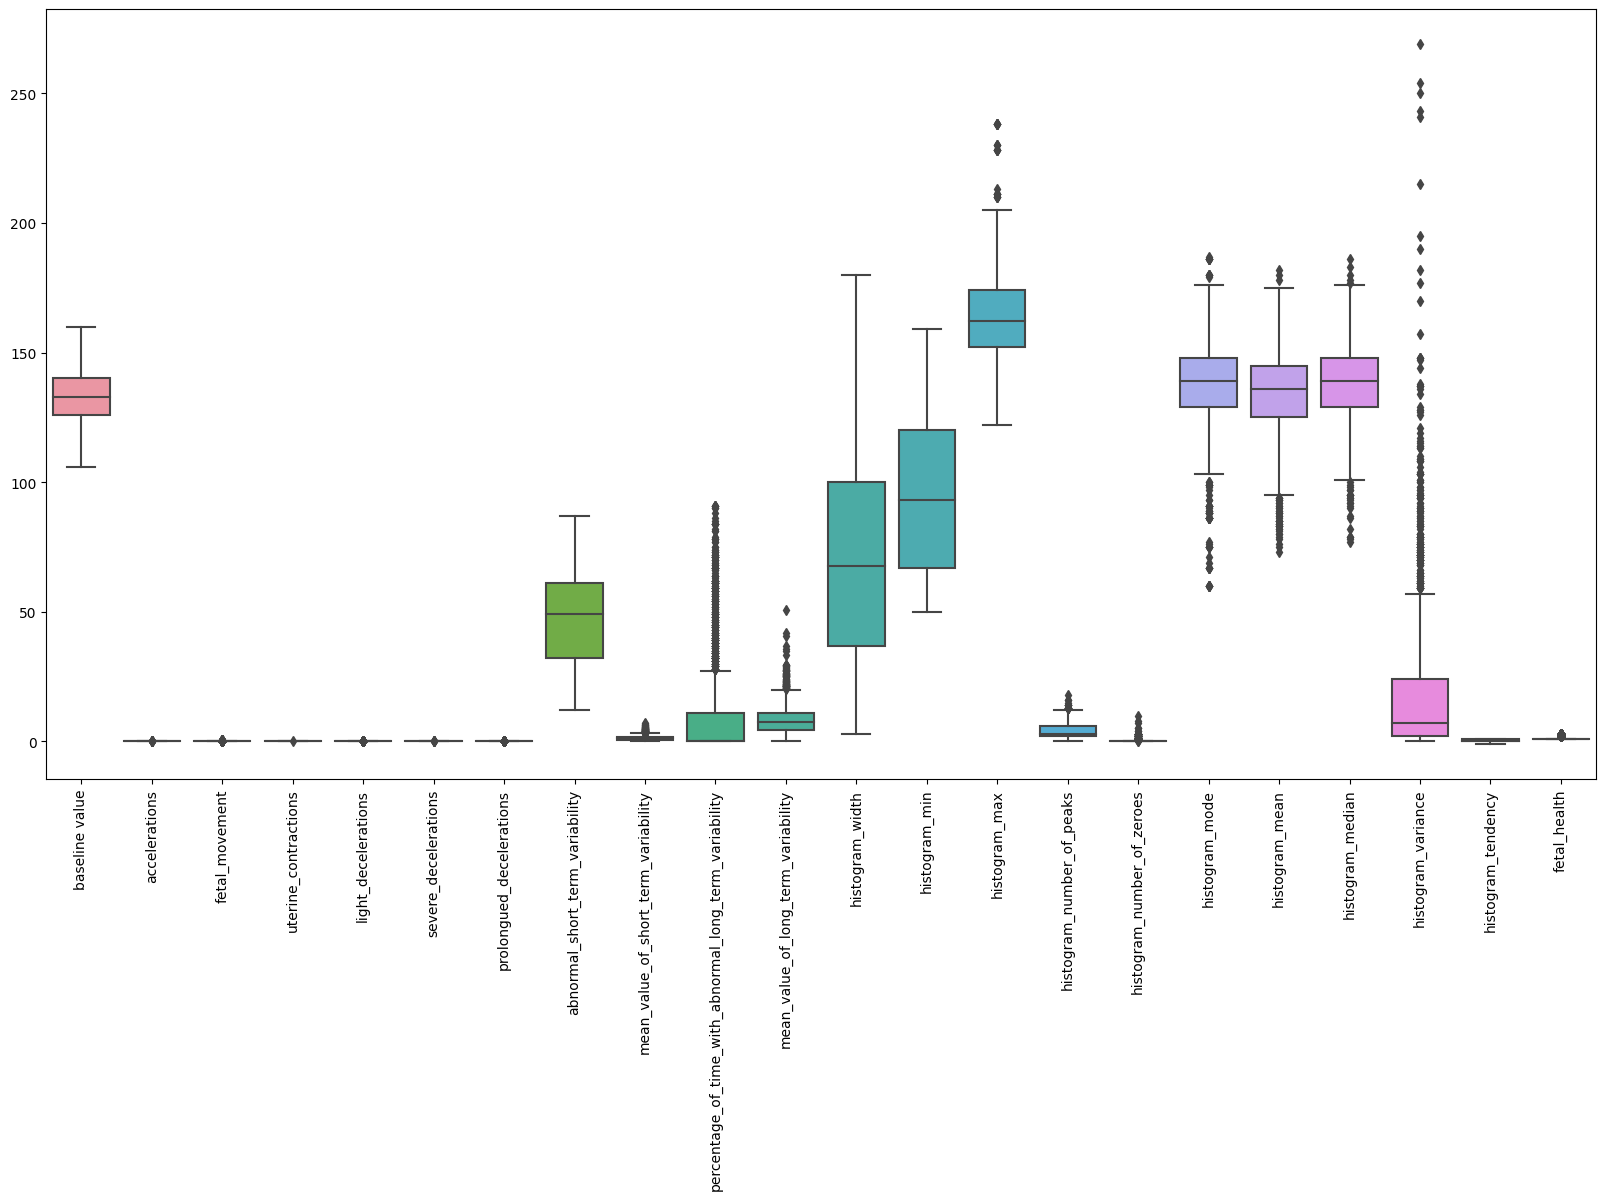

In [15]:
#univariant  analysis
plt.figure(figsize=(20,10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

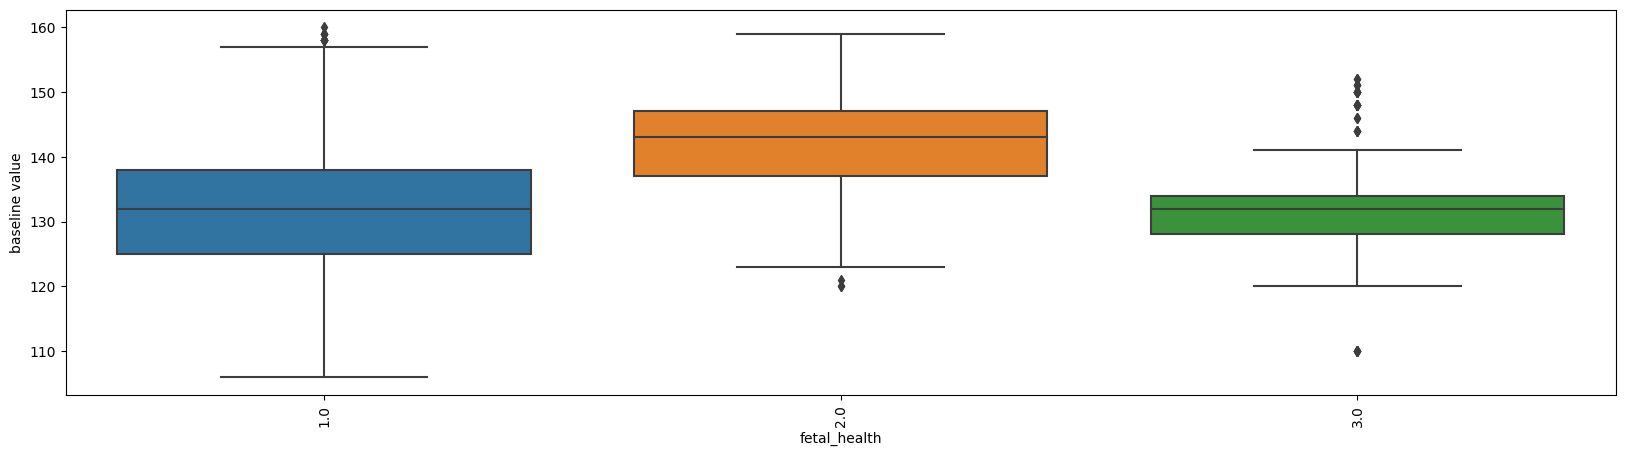

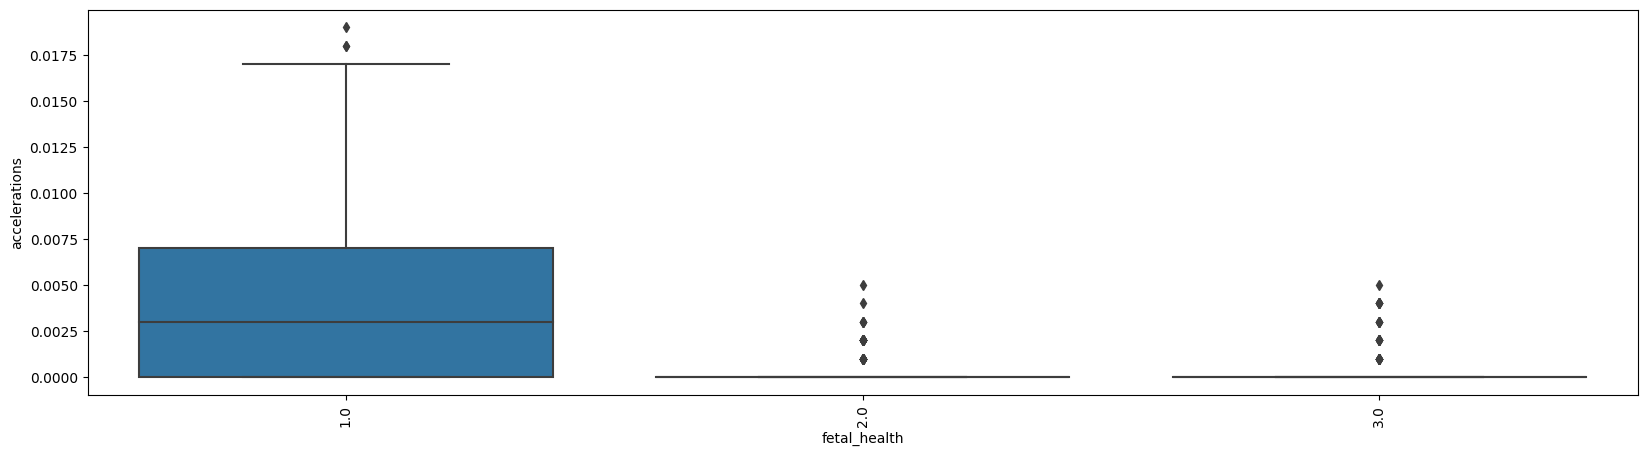

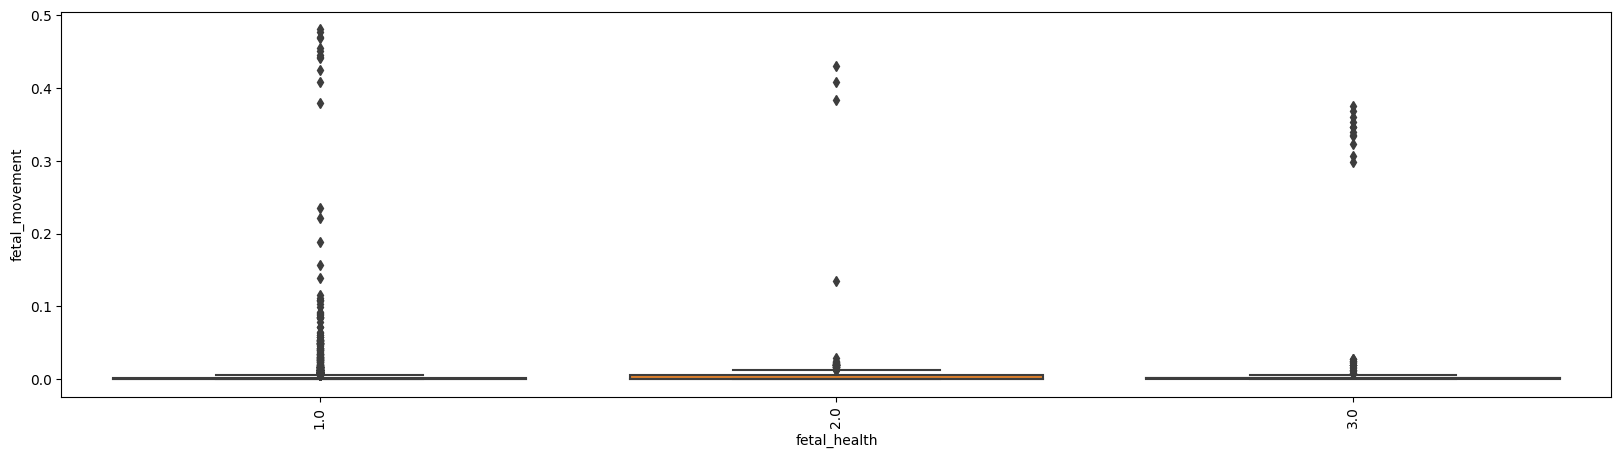

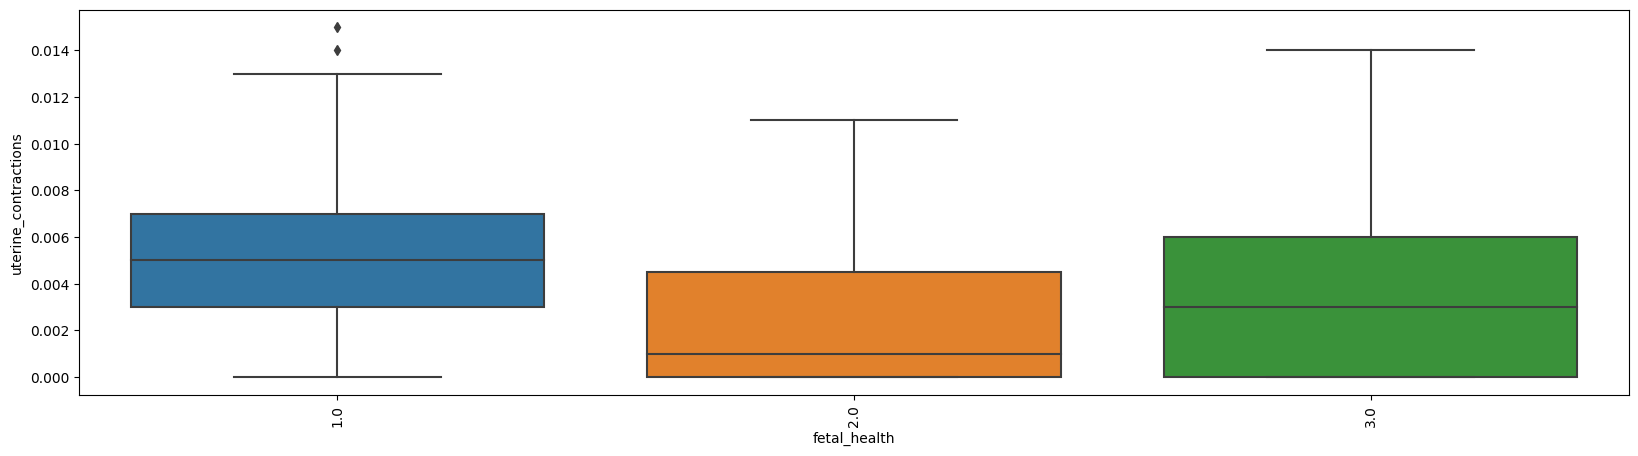

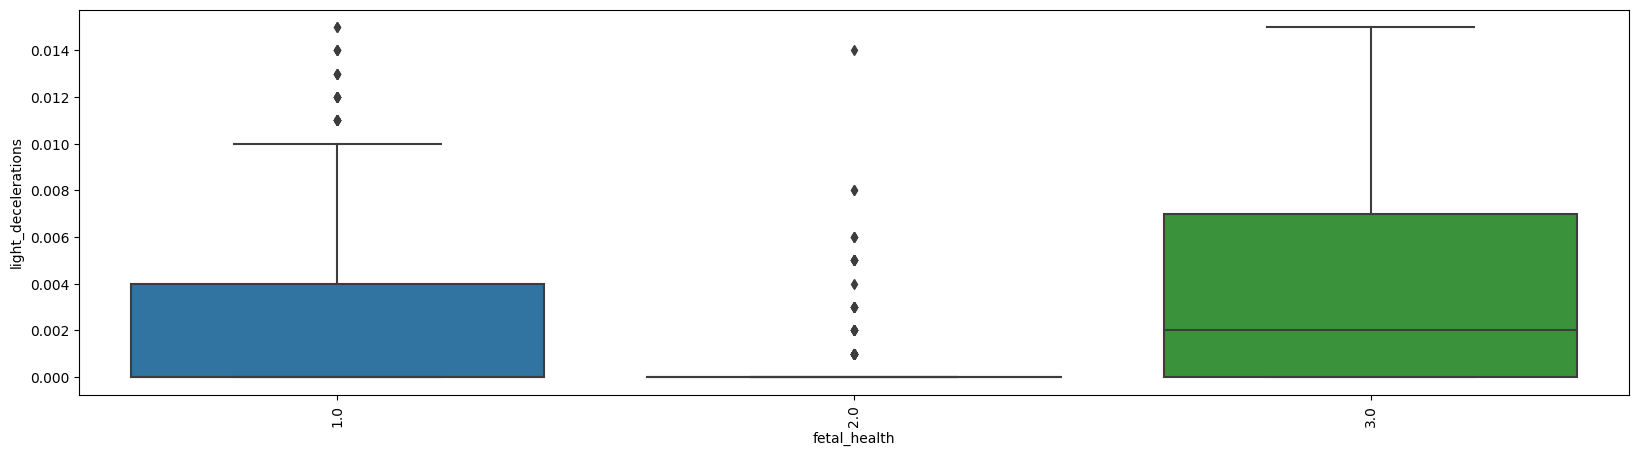

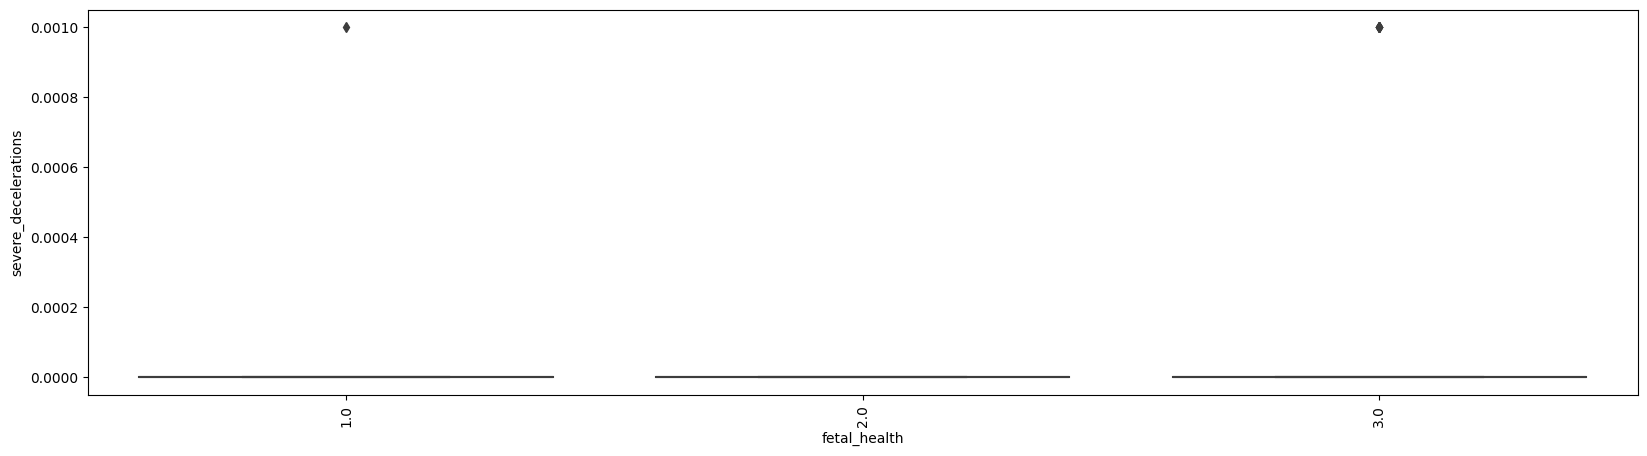

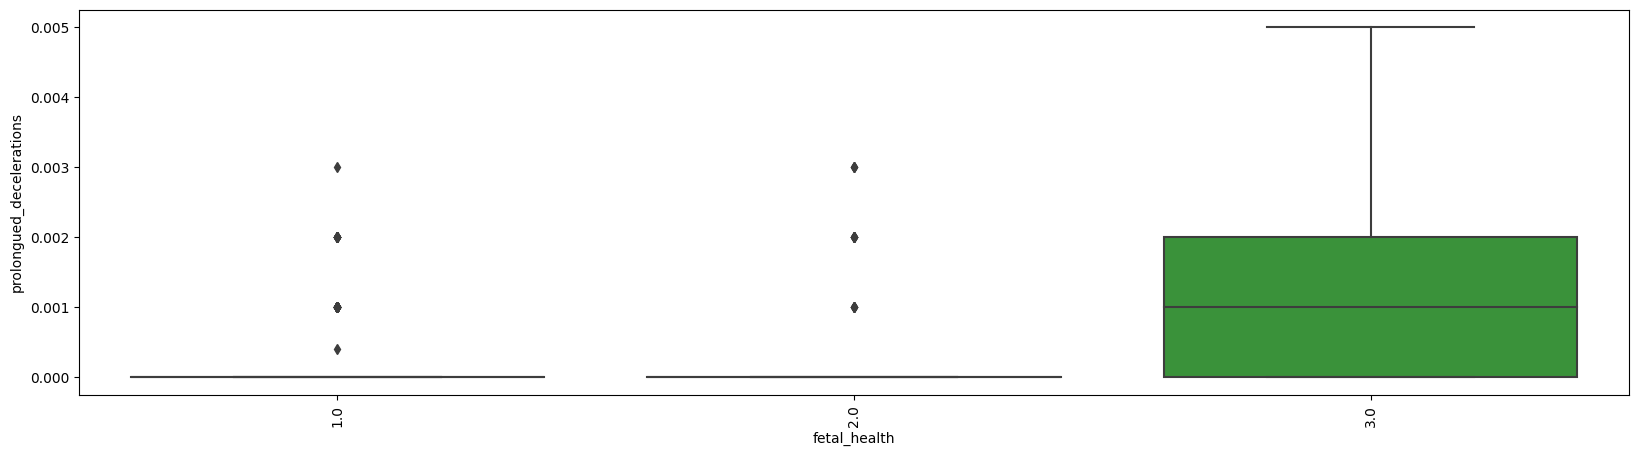

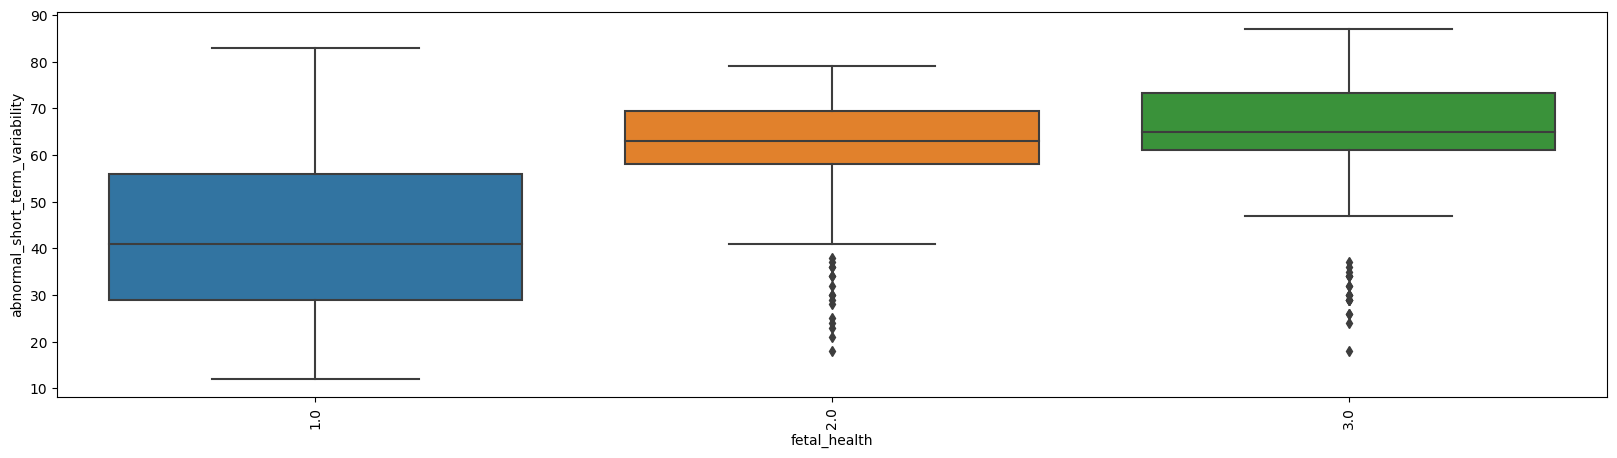

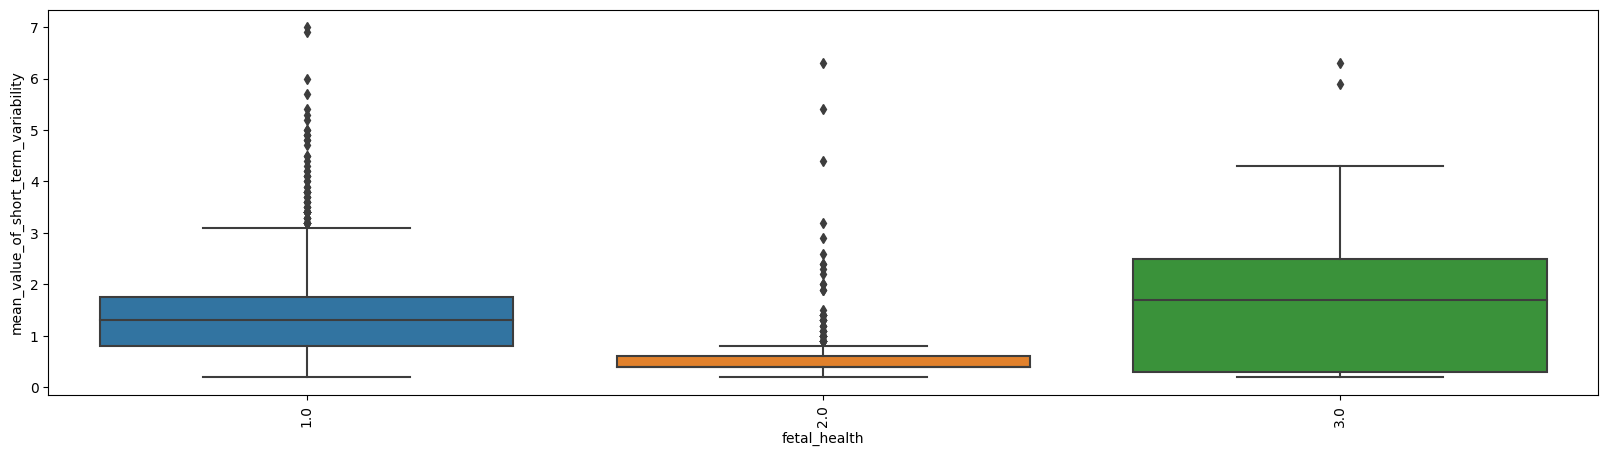

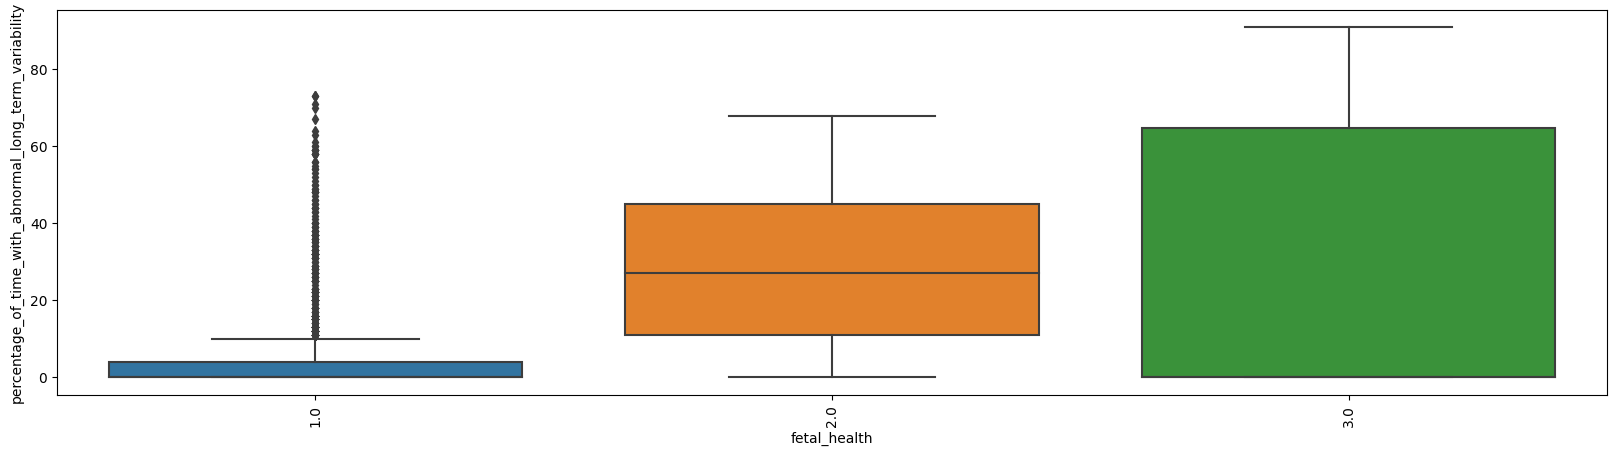

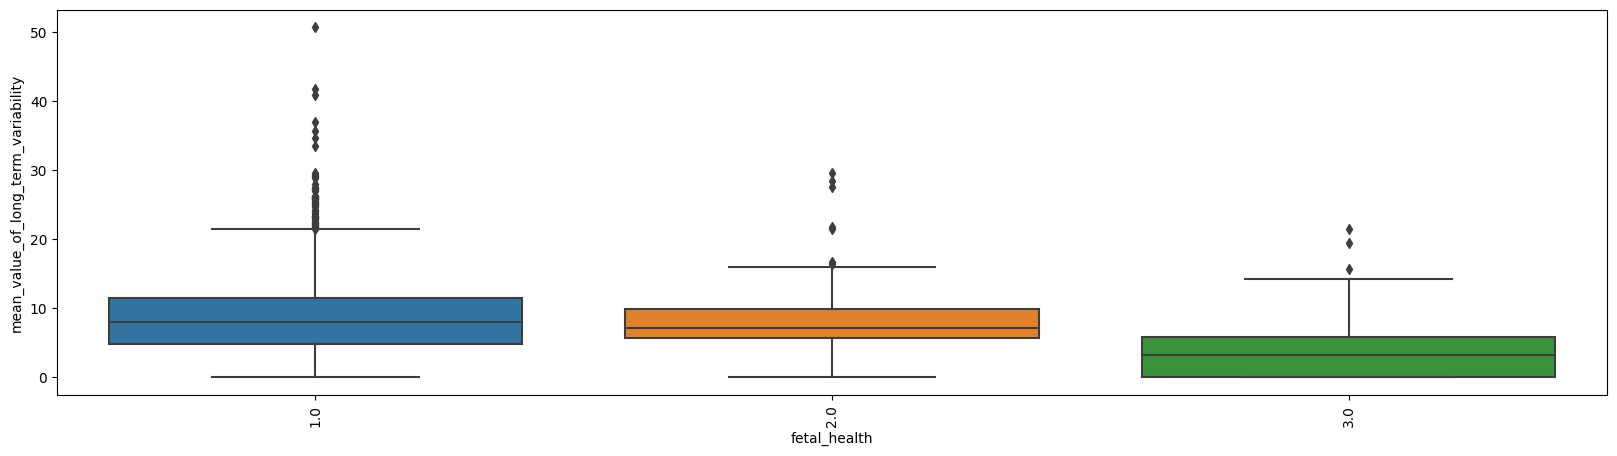

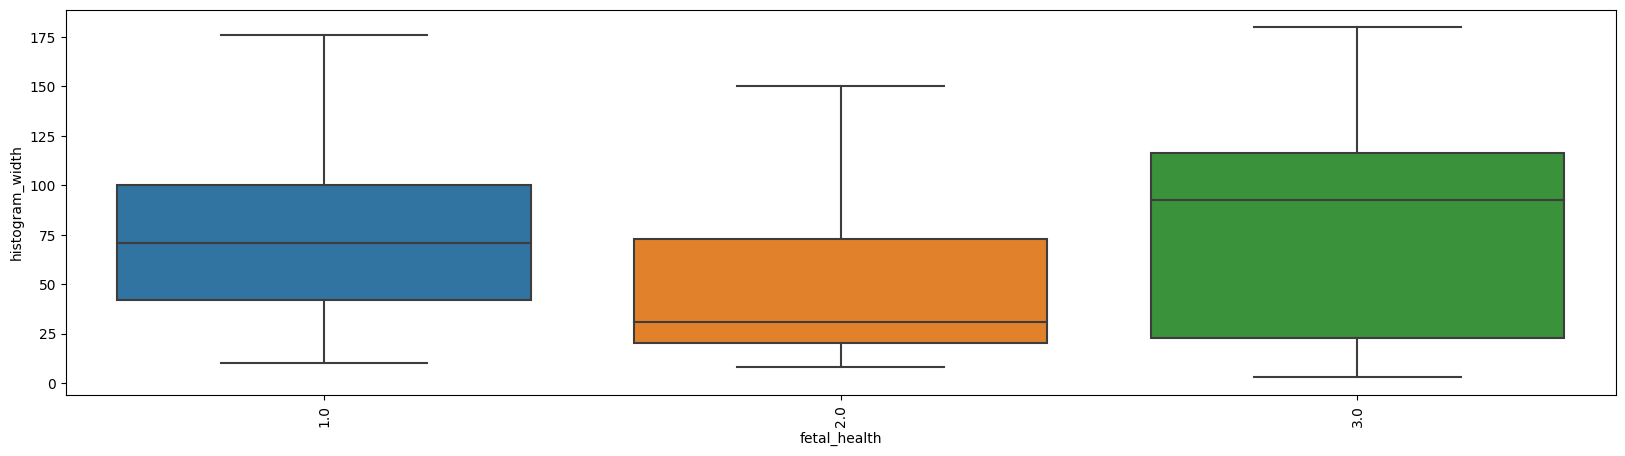

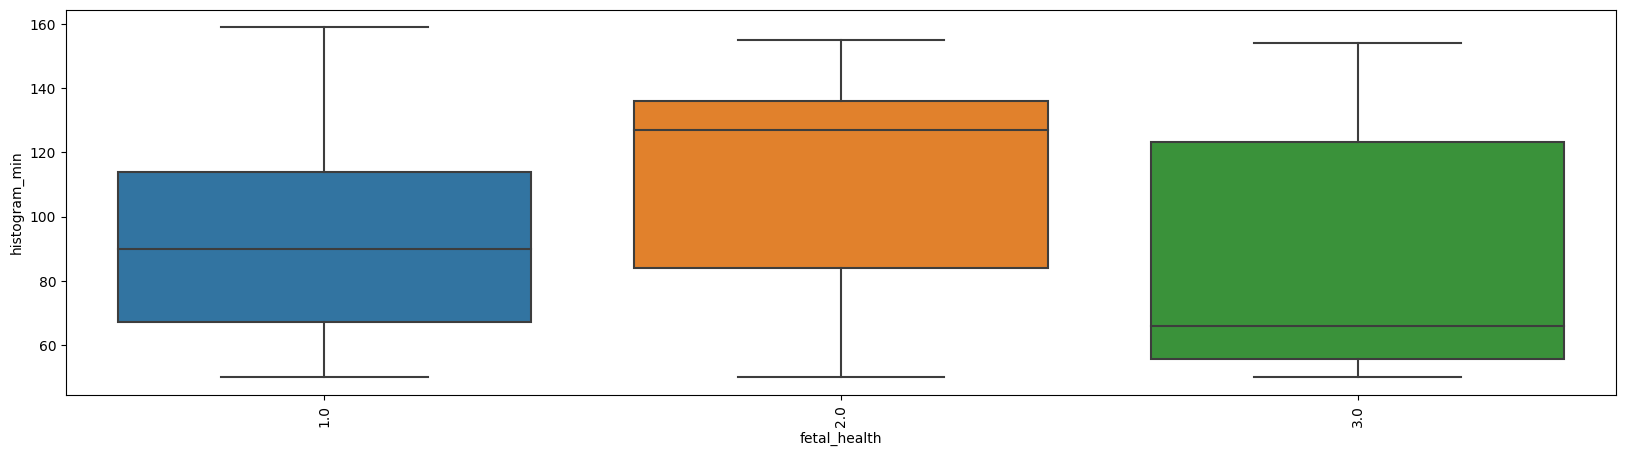

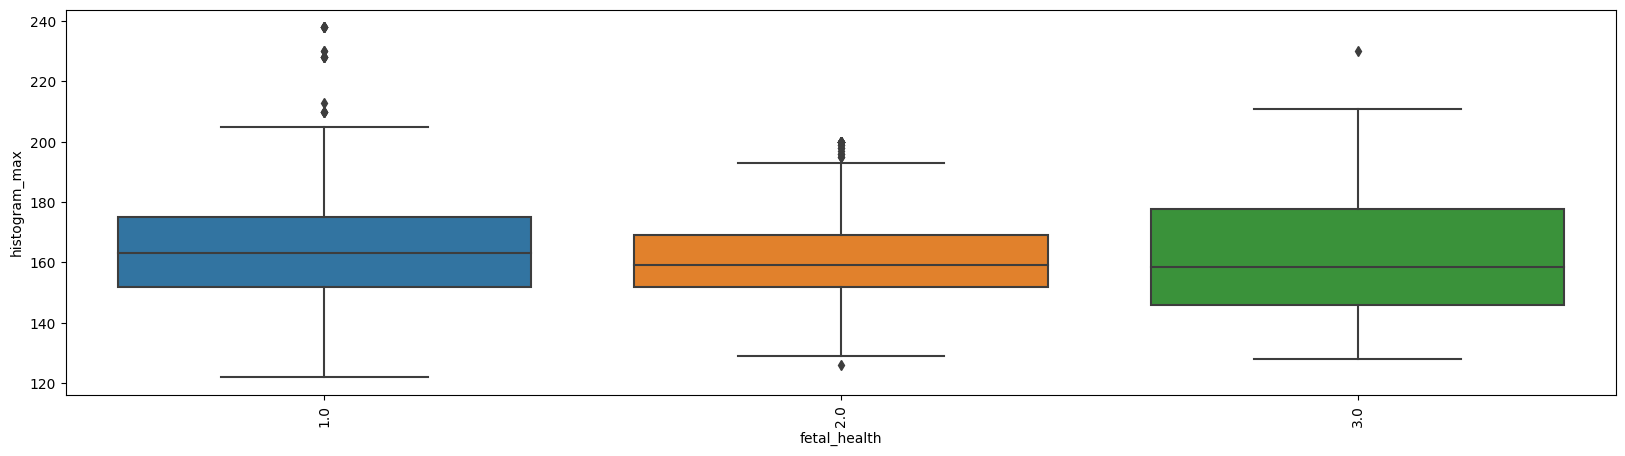

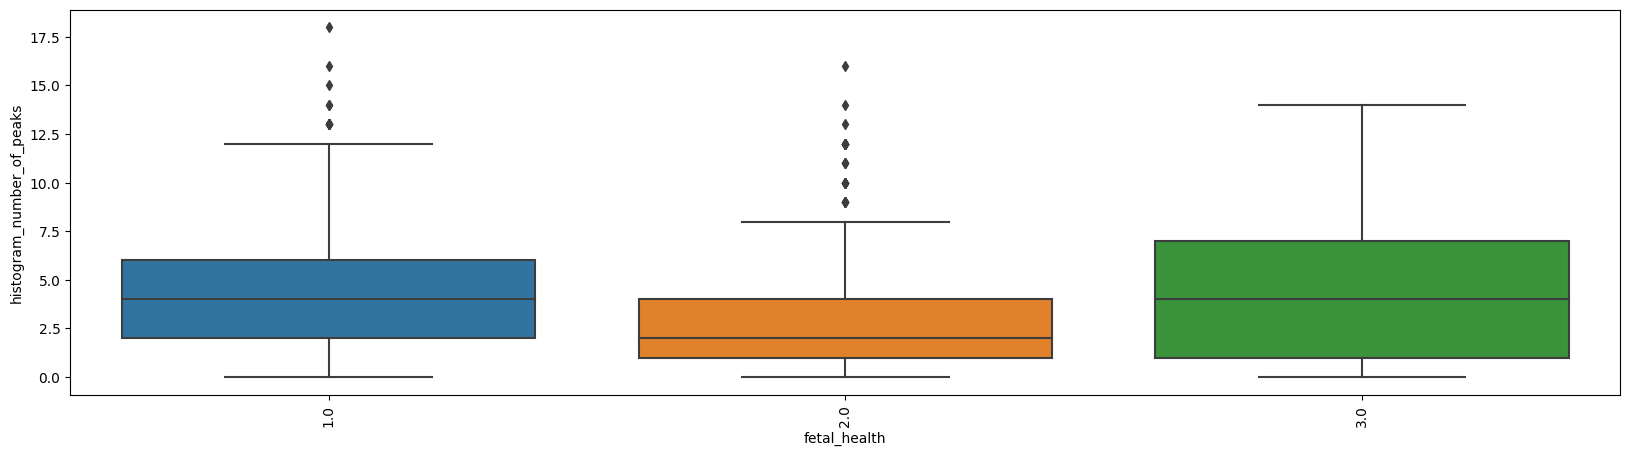

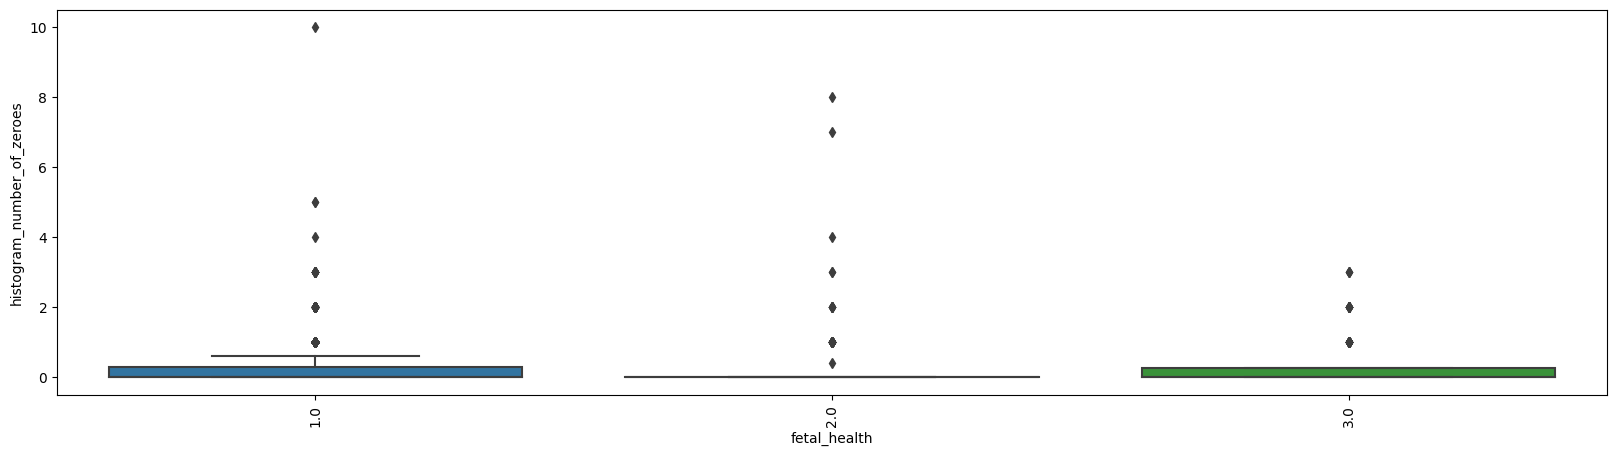

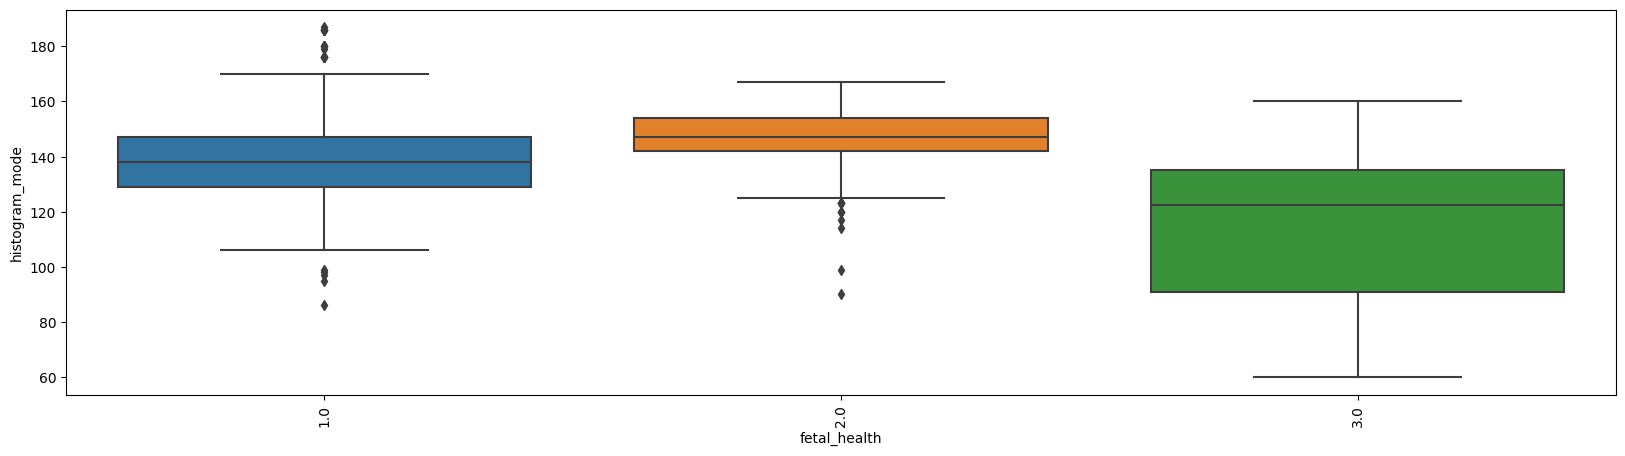

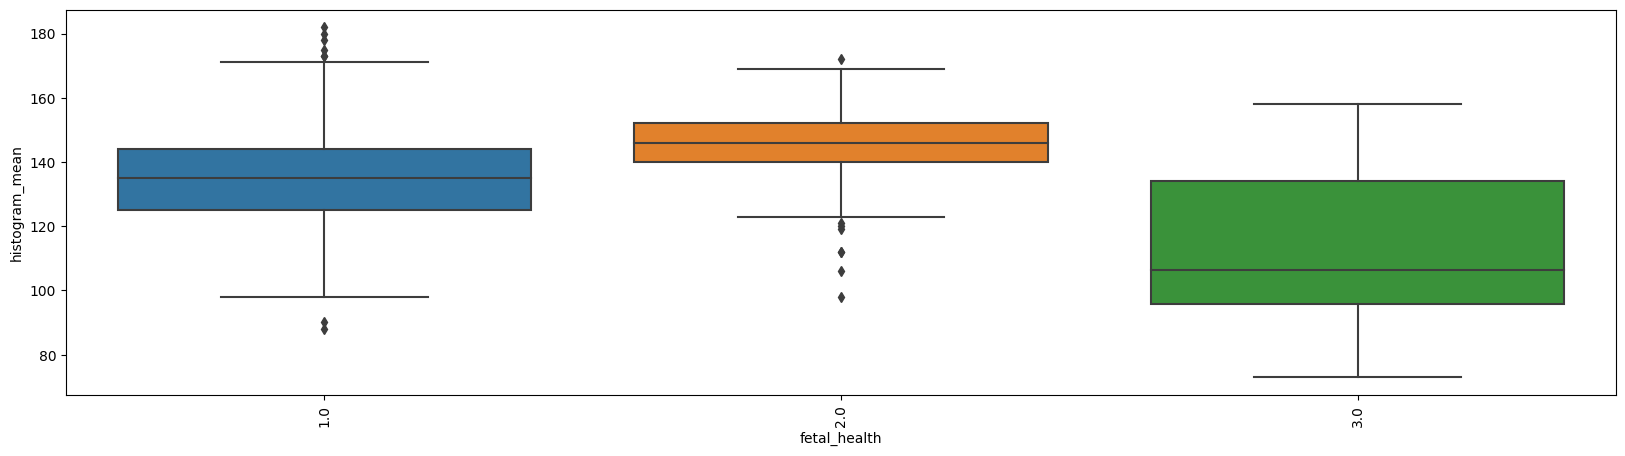

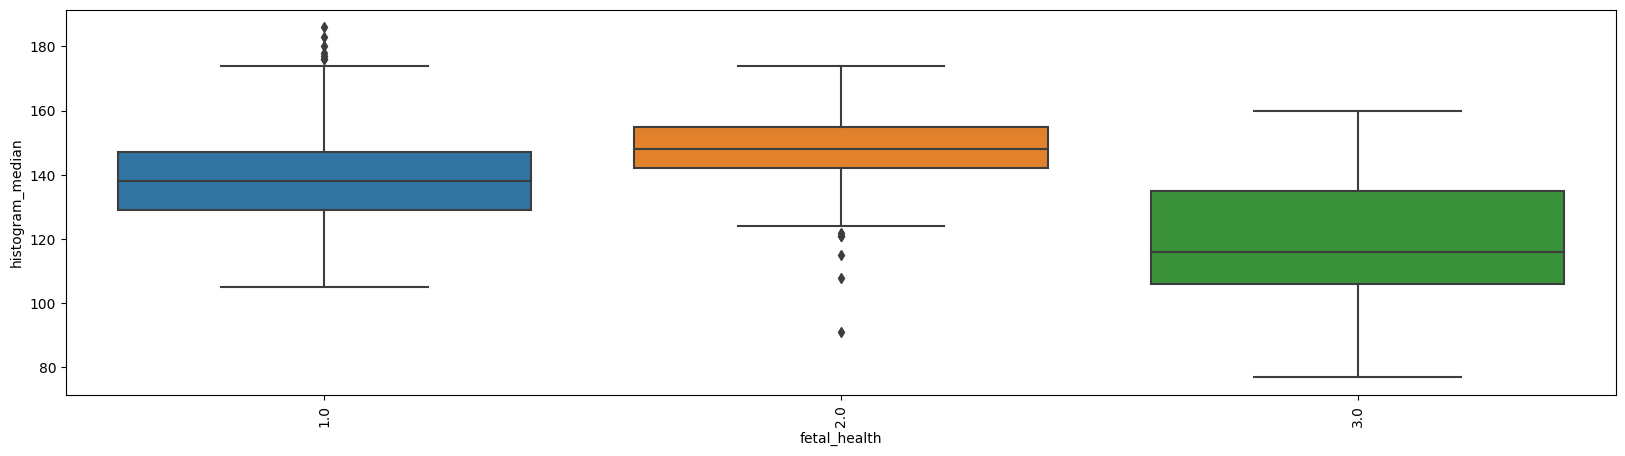

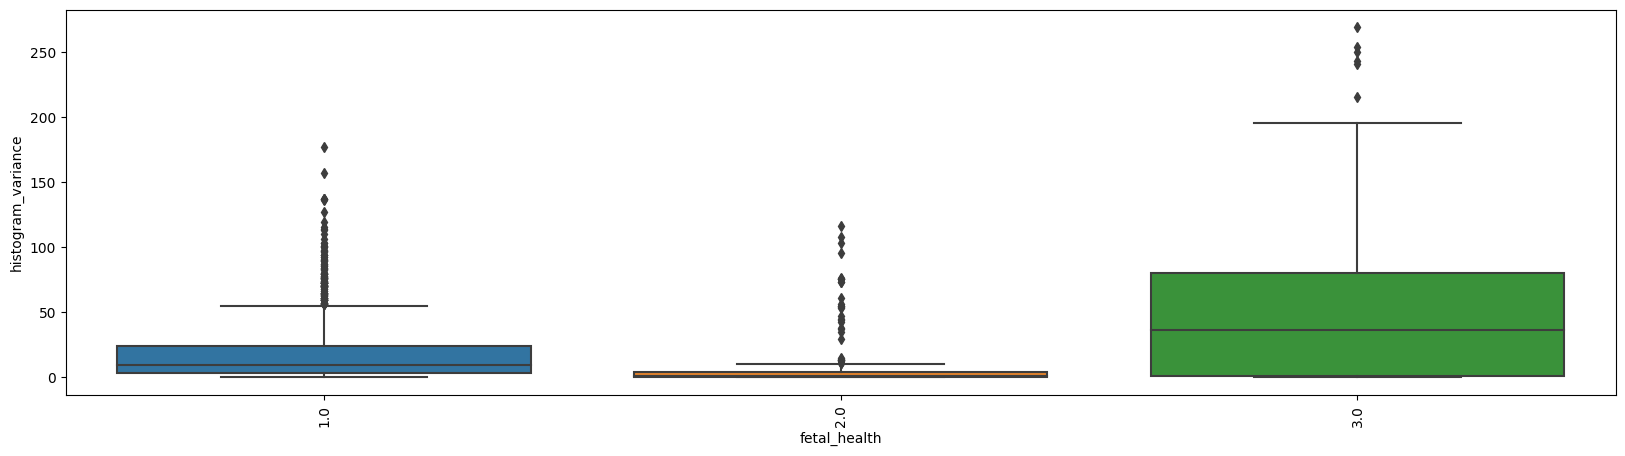

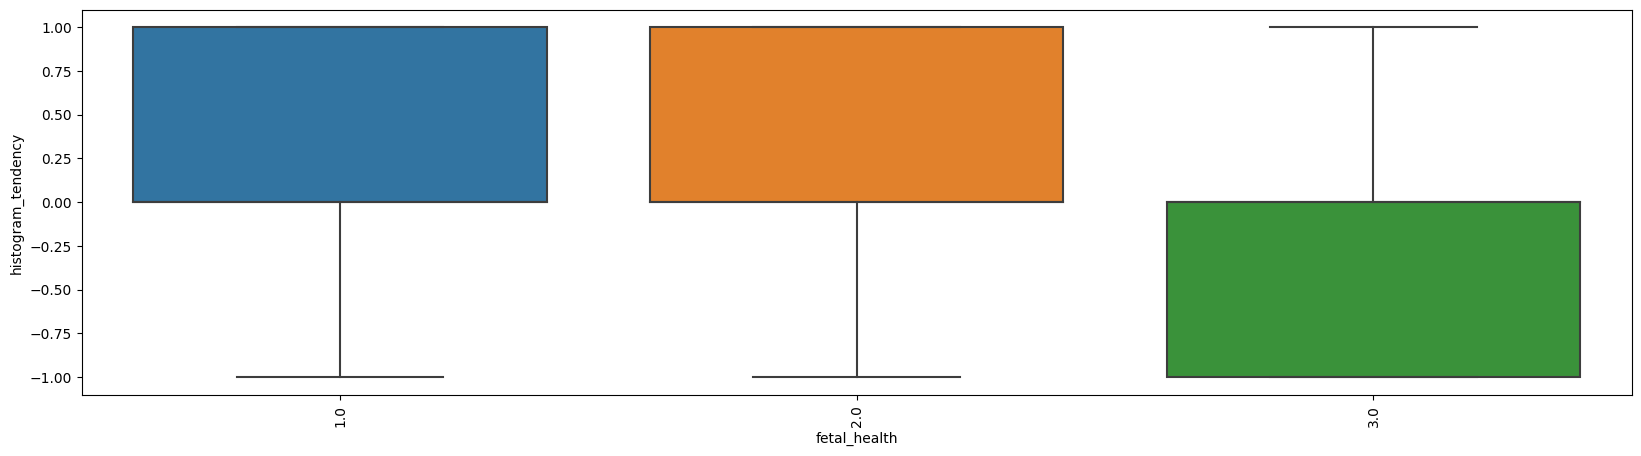

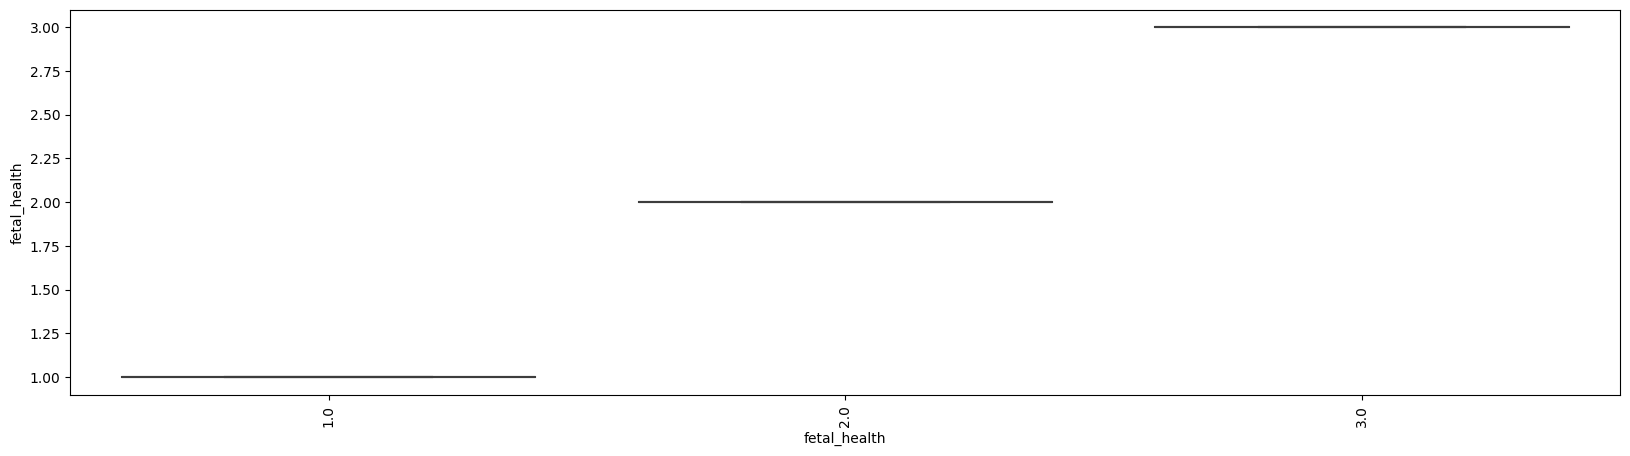

In [16]:
for i in df:
    plt.figure(figsize=(20,5))
    sns.boxplot(x= df['fetal_health'],y= df[i])
    plt.xticks(rotation=90)
    plt.show()

In [17]:
#baseline value
data=df['baseline value']
mean = np.mean(data)
std = np.std(data)
 
threshold = 3
outliers = []
for x in data:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("\nOutliers in baseline value: ", len(outliers))


Outliers in baseline value:  0


In [18]:
#accelerations
data=df['accelerations']
mean = np.mean(data)
std = np.std(data)
 
threshold = 3
outliers = []
for x in data:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("\nOutliers in accelerations: ", len(outliers))


Outliers in accelerations:  23


In [19]:
#fetal_movement
data=df['fetal_movement']
mean = np.mean(data)
std = np.std(data)
 
threshold = 3
outliers = []
for x in data:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("\nOutliers in fetal_movement: ", len(outliers))


Outliers in fetal_movement:  31


In [20]:
#uterine_contractions
data=df['mean_value_of_short_term_variability']
mean = np.mean(data)
std = np.std(data)
 
threshold = 3
outliers = []
for x in data:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("\nOutliers in uterine_contractions: ", len(outliers))


Outliers in uterine_contractions:  33


In [21]:
#light_decelerations
data=df['light_decelerations']
mean = np.mean(data)
std = np.std(data)
 
threshold = 3
outliers = []
for x in data:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("\nOutliers in light deceleration: ", len(outliers))


Outliers in light deceleration:  43


In [22]:
#severe_decelerations
data=df['severe_decelerations']
mean = np.mean(data)
std = np.std(data)
 
threshold = 3
outliers = []
for x in data:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("\nOutliers in severe decelerations: ", len(outliers))


Outliers in severe decelerations:  7


In [23]:
#prolongued_decelerations
data=df['prolongued_decelerations']
mean = np.mean(data)
std = np.std(data)
 
threshold = 3
outliers = []
for x in data:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("\nOutliers in prolongued decelerations: ", len(outliers))


Outliers in prolongued decelerations:  108


In [24]:
#abnormal_short_term_variability
data=df['abnormal_short_term_variability']
mean = np.mean(data)
std = np.std(data)
 
threshold = 3
outliers = []
for x in data:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("\nOutliers in abnormal short term variability: ", len(outliers))


Outliers in abnormal short term variability:  0


In [25]:
#mean_value_of_short_term_variability
data=df['mean_value_of_short_term_variability']
mean = np.mean(data)
std = np.std(data)
 
threshold = 3
outliers = []
for x in data:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("\nOutliers in mean_value_of_short_term_variability: ", len(outliers))


Outliers in mean_value_of_short_term_variability:  33


In [26]:
#percentage_of_time_with_abnormal_long_term_variability
data=df['percentage_of_time_with_abnormal_long_term_variability']
mean = np.mean(data)
std = np.std(data)
 
threshold = 3
outliers = []
for x in data:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("\nOutliers in :percentage_of_time_with_abnormal_long_term_variability ", len(outliers))


Outliers in :percentage_of_time_with_abnormal_long_term_variability  59


In [27]:
#mean_value_of_long_term_variability
data=df['mean_value_of_long_term_variability']
mean = np.mean(data)
std = np.std(data)
 
threshold = 3
outliers = []
for x in data:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("\nOutliers in mean_value_of_long_term_variability : ", len(outliers))


Outliers in mean_value_of_long_term_variability :  33


In [28]:
#histogram_width
data=df['histogram_width']
mean = np.mean(data)
std = np.std(data)
 
threshold = 3
outliers = []
for x in data:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("\nOutliers in :histogram_width ", len(outliers))


Outliers in :histogram_width  0


In [29]:
#histogram_min
data=df['histogram_min']
mean = np.mean(data)
std = np.std(data)
 
threshold = 3
outliers = []
for x in data:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("\nOutliers in :histogram_min ", len(outliers))


Outliers in :histogram_min  0


In [30]:
#histogram_max
data=df['histogram_max']
mean = np.mean(data)
std = np.std(data)
 
threshold = 3
outliers = []
for x in data:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("\nOutliers in histogram_max : ", len(outliers))


Outliers in histogram_max :  14


In [31]:
#histogram_number_of_peaks
data=df['histogram_number_of_peaks']
mean = np.mean(data)
std = np.std(data)
 
threshold = 3
outliers = []
for x in data:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("\nOutliers in : histogram_number_of_peaks", len(outliers))


Outliers in : histogram_number_of_peaks 19


In [32]:
#histogram_number_of_zeroes
data=df['histogram_number_of_zeroes']
mean = np.mean(data)
std = np.std(data)
 
threshold = 3
outliers = []
for x in data:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("\nOutliers in histogram_number_of_zeroes : ", len(outliers))


Outliers in histogram_number_of_zeroes :  28


In [33]:
#histogram_mode
data=df['histogram_mode']
mean = np.mean(data)
std = np.std(data)
 
threshold = 3
outliers = []
for x in data:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("\nOutliers in :histogram_mode ", len(outliers))


Outliers in :histogram_mode  39


In [34]:
#histogram_mean
data=df['histogram_mean']
mean = np.mean(data)
std = np.std(data)
 
threshold = 3
outliers = []
for x in data:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("\nOutliers in histogram_mean:", len(outliers))


Outliers in histogram_mean: 26


In [35]:
#histogram_median
data=df['histogram_median']
mean = np.mean(data)
std = np.std(data)
 
threshold = 3
outliers = []
for x in data:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("\nOutliers in histogram_median:", len(outliers))


Outliers in histogram_median: 16


In [36]:
#histogram_variance
data=df['histogram_variance']
mean = np.mean(data)
std = np.std(data)
 
threshold = 3
outliers = []
for x in data:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("\nOutliers in histogram_variance:", len(outliers))


Outliers in histogram_variance: 44


In [37]:
#histogram_tendency 
data=df['histogram_tendency']
mean = np.mean(data)
std = np.std(data)
 
threshold = 3
outliers = []
for x in data:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("\nOutliers in histogram_tendency:", len(outliers))


Outliers in histogram_tendency: 0


In [38]:
#fetal_health
data=df['fetal_health']
mean = np.mean(data)
std = np.std(data)
 
threshold = 3
outliers = []
for x in data:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("\nOutliers in fetal_helth:", len(outliers))


Outliers in fetal_helth: 0


##### handaling Outliers

In [11]:
iqr_cols = df.columns.tolist()[:-1] #all columns except the target

new_df = df.copy()

In [12]:
'''IQR'''
for col in iqr_cols:
    p_25 = new_df[col].quantile(0.25)
    p_75 = new_df[col].quantile(0.75)
    iqr = p_75 - p_25
    
    upper_limit = p_75 + (1.5 * iqr)
    lower_limit = p_25 + (1.5 * iqr)
    
    #Trimming Strategy:
    new_df.loc[new_df[col] > upper_limit, col] = upper_limit
    new_df.loc[new_df[col] < lower_limit, col] = lower_limit
    
    
    #Capping Strategy:
    #new_df[col] = np.where(
            #new_df[col] > upper_limit, upper_limit,
            #np.where(
                #new_df[col] < lower_limit, lower_limit, new_df[col] ))


# Feture selection

<Axes: >

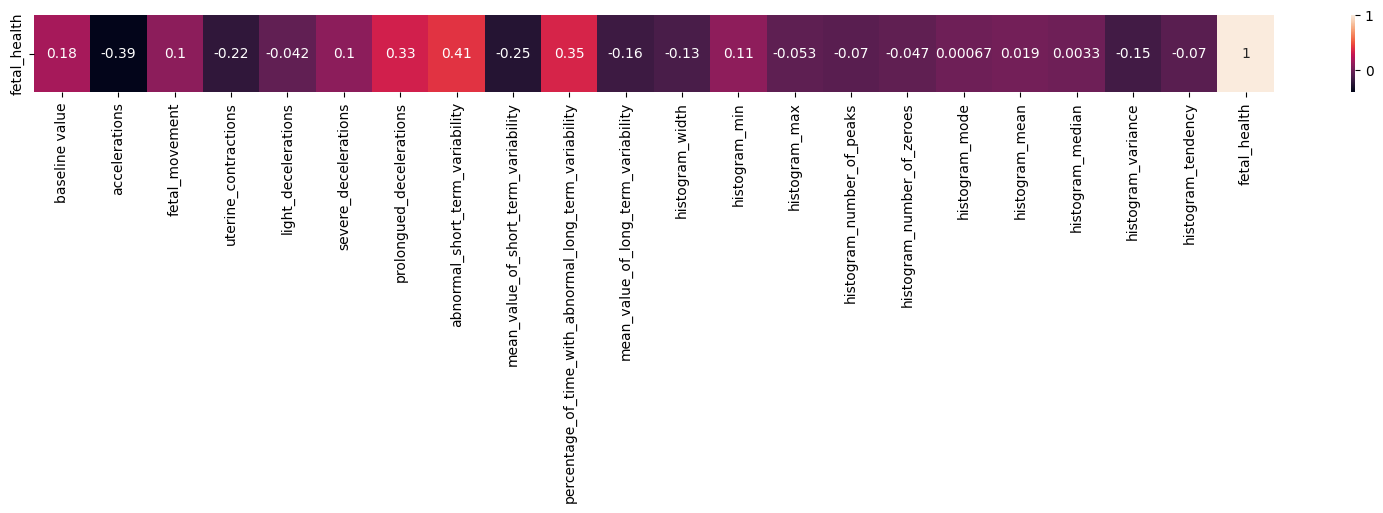

In [13]:
plt.figure(figsize=(20,1))
corr = df.corr(method='kendall').tail(1)
sns.heatmap(corr, annot = True)

##### We can see three features: "prolongued_decelerations", "abnormal_short_term_variability", "percentage_of_time_with_abnormal_long_term_variability" have high correlation with the target culumn (fetal_health).

# Checking wheter data is balance or not

In [14]:
bal=new_df['fetal_health'].value_counts()
bal

fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64

In [15]:
# engineering new categorical target column for Normal and At Risk fetal health
df.loc[df['fetal_health']==1.000, 'fh_outcome'] = '0'
df.loc[df['fetal_health']==2.000, 'fh_outcome'] = '1'
df.loc[df['fetal_health']==3.000, 'fh_outcome'] = '1'
#Normal=0 ,At risk=1
#I then removed the original fetal_health column from the dataframe.

<Axes: >

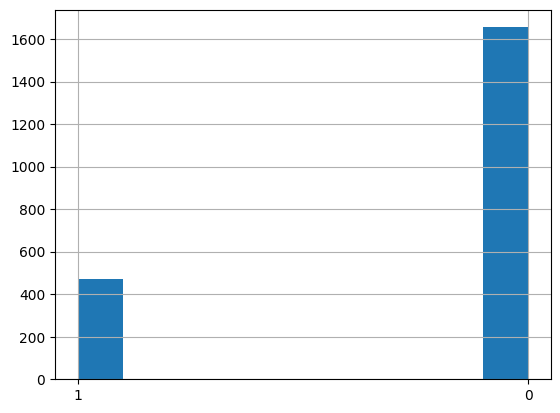

In [16]:
df.fh_outcome.hist()

##### This is still very unbalanced, but is somewhat more straightforward as a binary classification problem. And if we are working to maximize fetal health, then any member of an at-risk category should be treated with seriousness and urgency

In [44]:
#Splitting the dataset between independent features and dependent feature

x = df.iloc[:,:-2]
y = df["fh_outcome"]
# So the given data is contineous vs categorical

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 10, test_size = 0.2)

print('X_train', X_train.shape)
print('y_train', y_train.shape)

print('X_test', X_test.shape)
print('y_test', y_test.shape)

print("{0:0.2f}% data is in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(y.index)) * 100))

X_train (1700, 21)
y_train (1700,)
X_test (426, 21)
y_test (426,)
79.96% data is in training set
20.04% data is in test set


In [45]:
smote = SMOTE(random_state=3)
X_smote, y_smote = smote.fit_resample(x, y)

In [46]:
y_smote.value_counts()

fh_outcome
1    1655
0    1655
Name: count, dtype: int64

# Modeling

In [47]:
X_train, X_test, y_train, y_test  = train_test_split(x, y, test_size=0.25, random_state=3, stratify=y)

print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

X_train:  (1594, 21)
X_test:  (532, 21)
y_train:  (1594,)
y_test:  (532,)


In [ ]:
#Applying PCA
x = df.iloc[:,:-2]
y = df["fh_outcome"]
std_scaler = StandardScaler()
std_scaler_array = std_scaler.fit_transform(x)
x = pd.DataFrame(std_scaler_array, columns = x.columns)
x

In [ ]:
pca = PCA(n_components=None)
x_train_pca_array = pca.fit_transform(X_train)

columns = [f"PC{i}" for i in range(1, pca.n_components_+ 1) ]
x_train_pca = pd.DataFrame(x_train_pca_array, columns = columns)
x_train_pca

In [ ]:
var_array = np.cumsum(pca.explained_variance_ratio_)
var_array

In [ ]:
np.where(var_array < 0.90)

In [ ]:
#Model Training After selecting Top N PCs
pca = PCA(n_components=10)
x_train_pca_array = pca.fit_transform(X_train)

columns = [f"PC{i}" for i in range(1, pca.n_components_+ 1) ]
x_train_pca = pd.DataFrame(x_train_pca_array, columns = columns)
x_train_pca

# 1) KNN algorithm

In [ ]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train_pca, y_train)

train_accuracy = knn_clf.score(x_train_pca, y_train)
print("Train Accuarcy :",train_accuracy)

x_test_pca = pca.transform(X_test)
test_accuracy = knn_clf.score(x_test_pca, y_test)
print("Test Accuracy :", test_accuracy)

# 2)Logistic regression

In [ ]:
1. Easy to interpret and implement

2. Perform well on large data and low dimensional data

3. Classification Report: Report which includes Precision, Recall and F1-Score.
Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.

Precision = TP/TP+FP

Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes.

Recall = TP/TP+FN

F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account.
Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution.
Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, 
it’s better to look at both Precision and Recall.

F1 Score = 2(Recall Precision) / (Recall + Precision)

4. Confusion Matrix: The confusion matrix is a technique used for summarizing the performance of a classification algorithm i.e. it has binary outputs
    

In [ ]:
logistic_clf = LogisticRegression()
logistic_clf.fit(X_train, y_train)

In [ ]:
# Evaluation on Testing Data

y_pred = logistic_clf.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*50)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)
print("*"*50)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :\n",accuracy)

In [ ]:
# Evaluation on Training Data

y_pred_train = logistic_clf.predict(X_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*50)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)
print("*"*50)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :\n",accuracy)

# 3)Dicision tree
The decision tree algorithm is a popular supervised machine learning algorithm used for both classification and regression analysis. It works by recursively partitioning the feature space into subsets based on the values of the features and their relationship with the target variable.

In a decision tree, each internal node represents a test on a feature, and each branch represents the outcome of the test. The leaves of the tree represent the class or value of the target variable for a given combina1on of feature values. The tree is constructed by selecting the best feature to split the data at each node based on a certain criterion, such as information gain or Gain impurity.

The decision tree algorithm has several advantages, including its simplicity, interpretability, and effectiveness in dealing with both categorical and con1nuous features. Decision trees can also handle missing values and outliers and can be used for feature selection and feature engineering. 



In [ ]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

In [ ]:
# Testing Data Evalution

y_pred = dt_clf.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*30)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)
print("*"*30)
accuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy :",accuracy)



In [ ]:
# Training Data Evalution

y_pred_train = dt_clf.predict(X_train)
cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*30)
clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)
print("*"*30)
accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy :",accuracy)


In [ ]:
#Prunig
dt_clf = DecisionTreeClassifier(random_state=10,ccp_alpha=None)

path = dt_clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, _ = path.ccp_alphas, path.impurities
ccp_alphas

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=10,ccp_alpha=0.0059223)

dt_clf.fit(X_train, y_train)

print("Training Accuracy ==",dt_clf.score(X_train, y_train))
print("Testing  Accuracy ==",dt_clf.score(X_test, y_test))

In [ ]:
train_accuracy_list = []
test_accuracy_list = []
for ccp_alpha in ccp_alphas:
    print("CCP Alpha :", ccp_alpha)
    dt_clf = DecisionTreeClassifier( ccp_alpha=ccp_alpha)
    dt_clf.fit(X_train, y_train)
    train_accuracy_list.append(dt_clf.score(X_train, y_train))
    test_accuracy_list.append(dt_clf.score(X_test, y_test))
    print("Training Accuracy ==",dt_clf.score(X_train, y_train))
    print("Testing  Accuracy ==",dt_clf.score(X_test, y_test))
    print("*"*30)
plt.plot(ccp_alphas,train_accuracy_list )
plt.plot(ccp_alphas,test_accuracy_list )

# 4)Random Forest

In [ ]:
#random forest
rf_clf = RandomForestClassifier(n_estimators=100,
                                criterion='gini',
                                max_depth=None,
                                min_samples_split=2,
                                min_samples_leaf=1,
                                max_features='sqrt',
                                bootstrap=True,
                                oob_score=True,
                                n_jobs=None,
                                random_state=2,
                            )
rf_clf.fit(X_train, y_train)

In [ ]:
# Testing Data Evalution

y_pred = rf_clf.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*30)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)
print("*"*30)
accuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy :",accuracy)

In [ ]:
# Testing Data Evalution

y_pred = rf_clf.predict(X_train)
cnf_matrix = confusion_matrix(y_train, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*30)

clf_report = classification_report(y_train, y_pred)
print("Classification Report :\n",clf_report)
print("*"*30)
accuracy = accuracy_score(y_train, y_pred)
print("Training Accuracy :",accuracy)

# 5)Adaboost

In [ ]:
#Adaboost
adb_clf = AdaBoostClassifier(estimator=None,
                    n_estimators=50,
                    learning_rate=1.0,
                    random_state=1)

adb_clf.fit(X_train, y_train)

In [ ]:
# Testing Data Evalution

y_pred = adb_clf.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*30)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)
print("*"*30)
accuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy :",accuracy)

In [ ]:
# Testing Data Evalution

y_pred = adb_clf.predict(X_train)
cnf_matrix = confusion_matrix(y_train, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*30)

clf_report = classification_report(y_train, y_pred)
print("Classification Report :\n",clf_report)
print("*"*30)
accuracy = accuracy_score(y_train, y_pred)
print("Training Accuracy :",accuracy)

In [ ]:
All

In [ ]:
1)KNN
Test Accuracy : 0.9097744360902256
Train Accuarcy : 0.9485570890840652

2)Logistic
test Accuracy : 0.868421052631579
train Accuracy : 0.8864491844416562

3)Dicision tree
Testing  Accuracy : 0.9154135338345865
Training Accuracy : 0.9259723964868256

4)RF
Testing Accuracy : 0.956766917293233
Training Accuracy : 0.998745294855709

5)Adabost
Testing Accuracy : 0.9379699248120301
Training Accuracy : 0.965495608531995

# 